In [1]:
using Revise, Plots, DataFrames, Random, PyCall, Debugger, XLSX, Glob, Suppressor, Distributions
#Only have to do this once
#pushfirst!(LOAD_PATH, "/home/isaac/SAAD")

print(LOAD_PATH)
using Phylo
pathof(Phylo)

┌ Info: Precompiling Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1278
┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1278
┌ Info: Precompiling Debugger [31a5f54b-26ea-5ae9-a837-f05ce5417438]
└ @ Base loading.jl:1278
┌ Info: Precompiling XLSX [fdbf4ff8-1666-58a4-91e7-1b58723a45e0]
└ @ Base loading.jl:1278
┌ Info: Precompiling Suppressor [fd094767-a336-5f1f-9728-57cf17d0bbfb]
└ @ Base loading.jl:1278
┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1278


["@", "@v#.#", "@stdlib"]

┌ Info: Precompiling Phylo [aea672f4-3940-5932-aa44-993d1c3ff149]
└ @ Base loading.jl:1278


"/home/isaac/.julia/packages/Phylo/0WXtf/src/Phylo.jl"

In [2]:
# Update the Phylo package
# pkg> up Phylo@v0.4.21
using Pkg
Pkg.status("Phylo")

Status `~/.julia/environments/v1.5/Project.toml`
  [aea672f4] Phylo v0.4.21


## Sample name to species mappings per island
There's a lot of heterogeneity in the sample name to species mappings so it might just be easiest, since there are relatively few samples, to do it by hand for now.

In [3]:
samps = Dict("Reunion"=>Dict(), "Mauritius"=>Dict(), "Rodrigues"=>Dict())

## Add Reunion samples
samps["Reunion"]["Coracina newtoni"] = ["HM002973"]
samps["Reunion"]["Hypsipetes borbonicus"] = ["Hypsipetes_borbonicus_REUNION_AY590733",
                                                        "Hypsipetes_borbonicus_REUNION_AY590734"]
samps["Reunion"]["Saxicola tectes"] = ["Saxicola_tectes_REUNION_EU190909",
                                                    "Saxicola_tectes_REUNION_EU190910",
                                                    "Saxicola_tectes_REUNION_EU190911",
                                                    "Saxicola_tectes_REUNION_EU190912",
                                                    "Saxicola_tectes_REUNION_EU421119"]
samps["Reunion"]["Terpsiphone bourbonnensis"] = ["Terpsiphone_bourbonnensis_bourbonnensis_222",
                                                              "Terpsiphone_bourbonnensis_bourbonnensis_255",
                                                              "Terpsiphone_bourbonnensis_bourbonnensis_302",
                                                              "Terpsiphone_bourbonnensis_bourbonnensis_353",
                                                              "Terpsiphone_bourbonnensis_bourbonnensis_38",
                                                              "Terpsiphone_bourbonnensis_bourbonnensis_90"]
samps["Reunion"]["Zosterops borbonicus"] = ["Zosterops_borbonicus_REUNION_BWM46",
                                                        "Zosterops_borbonicus_REUNION_BWM47",
                                                        "Zosterops_borbonicus_REUNION_BWM54",
                                                        "Zosterops_borbonicus_borbonicus_LK056802"]
samps["Reunion"]["Zosterops olivaceus"] = ["Zosterops_olivaceus_REUNION_BWM49",
                                                        "Zosterops_olivaceus_REUNION_BWM55a"]
samps["Reunion"]["Circus maillardi"] = ["DB24_C_maillardi_Reunion",
                                                    "DB25_C_maillardi_Reunion"]
# Underscores for agreement with changes in the sample names in the nexus files
samps["Reunion"]["Nesoenas picturata"] = ["_2109_Nesoenas_picturata_Reunion",
                                                        "_503_Nesoenas_picturata_Reunion",
                                                        "_873_Nesoenas_picturata_Reunion"]
samps["Reunion"]["Aerodramus francicus"] = ["LC1_Aerodramus_francicus_cytb_Reunion",
                                                        "SEOR1_Aerodramus_francicus_Reunion"]

# UPDATE (Sept 2022): Phedina for analysis with the Phedina_BEAST_tree_Dec2020-MauriceOnly.tre
# which only included sequence data for 2 samples from Mauritius. This is the Note on that:
#
# Phedina borbonica has abundances but not sequence yet, so if we consider them as undiverged from
# Mauritius, then these samples can serve as a proxy for Reunion divergence.
# samps["Reunion"]["Phedina borbonica"] = ["M96a_Phedina_borbonica", "M97a_Phedina_borbonica"]
samps["Reunion"]["Phedina borbonica"] = ["BW_CDS2543_Phedina_borbonica_Reunion",
                                          "BW_CDS1901_Phedina_borbonica_Reunion"]

## Add Mauritius samples
samps["Mauritius"]["Coracina typica"] = ["HM002988"]
samps["Mauritius"]["Foudia rubra"] = ["F_rubra_M21_Mauritius","Mau1Hybrid",
                                        "Mau3MauMother", "Mau2Hybrid",
                                        "Mau5", "Mau7", "Mau8", "Mau9", "Mau6"]
samps["Mauritius"]["Hypsipetes olivaceus"] = ["Hypsipetes_olivaceus_MAURITIUS_AY590735",
                                                "Hypsipetes_olivaceus_MAURITIUS_AY590736"]
samps["Mauritius"]["Psittacula eques"] = ["Psittacula_echo_MAURITIUS_AY220113",
                                        "Psittacula_echo_MAURITIUS_LN614518 "]
samps["Mauritius"]["Terpsiphone bourbonnensis"] = ["Terpsiphone_bourbonnensis_desolata"]
samps["Mauritius"]["Zosterops chloronothos"] = ["Zosterops_chloronothus_MAURITIUS_BWM28",
                                                "Zosterops_chloronothus_MAURITIUS_BWM29"]
samps["Mauritius"]["Zosterops mauritianus"] = ["Zosterops_mauritianus_MAURITIUS_BWM17",
                                                "Zosterops_mauritianus_MAURITIUS_BWM24",
                                                "Zosterops_mauritianus_MAURITIUS_BWM25",
                                                "Zosterops_mauritianus_MAURITIUS_LK056799",
                                                "Zosterops_mauritianus_MAURITIUS_LK056800",
                                                "Zosterops_mauritianus_MAURITIUS_LK056801 "]
samps["Mauritius"]["Falco punctatus"] = ["punct103_F_punctatus",
                                            "punct116_F_punctatus",
                                            "punct62_F_punctatus"]
samps["Mauritius"]["Nesoenas mayeri"] = ["TA_Nesoenas_mayeri_Captive"]
samps["Mauritius"]["Nesoenas picturata"] = ["L565_Nesoenas_picturata_Mauritius"]
samps["Mauritius"]["Aerodramus francicus"] = ["DHC52_Aerodramus_francicus_Mauritius",
                                                "DHC53_Aerodramus_francicus_Mauritius"]

# UPDATE (Sept 2022): Phedina for analysis with the Phedina_BEAST_tree_Dec2020-MauriceOnly.tre
# which only included sequence data for 2 samples from Mauritius.
#samps["Mauritius"]["Phedina borbonica"] = ["M96a_Phedina_borbonica", "M97a_Phedina_borbonica"]
samps["Mauritius"]["Phedina borbonica"] = ["BW_95_Phedina_borbonica_Maurice",
                                            "BW_91_Phedina_borbonica_Maurice",
                                            "BW_93_Phedina_borbonica_Maurice",
                                            "BW_94_Phedina_borbonica_Maurice",
                                            "BW_97_Phedina_borbonica_Maurice",
                                            "BW_92_Phedina_borbonica_Maurice",
                                            "BW_98_Phedina_borbonica_Maurice"]

## Add Rodrigues samples
samps["Rodrigues"]["Acrocephalus rodericanus"] = ["Acrocephalus_rodericanus_RODRIGUES_L556",
                                                    "Acrocephalus_rodericanus_RODRIGUES_L568"]
samps["Rodrigues"]["Foudia flavicans"] = ["F_flavicans_M30_Rodrigues",
                                            "F_flavicans_M32_Rodrigues",
                                            "F_flavicans_M34_Rodrigues"]
samps

Dict{String,Dict{Any,Any}} with 3 entries:
  "Mauritius" => Dict{Any,Any}("Falco punctatus"=>["punct103_F_punctatus", "pun…
  "Reunion"   => Dict{Any,Any}("Saxicola tectes"=>["Saxicola_tectes_REUNION_EU1…
  "Rodrigues" => Dict{Any,Any}("Foudia flavicans"=>["F_flavicans_M30_Rodrigues"…

# Do it all


In [84]:
function plot_saad(island)
    df = load_sheet()
    df = get_abunds(df, island)
    df = read_nexus(df)
    df = get_mrcas(df, island)
    plot_saad!(df, "SAADs", island)
end
plot()
plot_saad("Reunion")
plot_saad("Mauritius")
png("Mascarene_SAAD")
#plot_saad("Rodrigues")

## Get abundance data

In [98]:
function load_sheet()
    xlf = "/home/isaac/SAAD/SAADs_Toy_Dataset/ToyDataset_Master_Sheet_V3.xlsx"
    xf = XLSX.readxlsx(xlf)
    dat = xf["Sheet1!A13:I47"]
    df = DataFrame(dat, :auto)
    n=["Island",
            "Genus",
            "Species",
            "Subspecies",
            "1", "2",
            "Absolute",
            "Minimum",
            "Maximum"]
    df = rename!(df, n)
    return df
end
load_sheet()

,Island,Genus,Species,Subspecies,1,2,Absolute
,Any,Any,Any,Any,Any,Any,Any
1,Reunion,Coracina,newtoni,missing,missing,missing,88.0
2,Reunion,Hypsipetes,borbonicus,missing,missing,missing,missing
3,Reunion,Saxicola,tectes,missing,missing,missing,180000.0
4,Reunion,Terpsiphone,bourbonnensis,bourbonnensis,missing,missing,49500.0
5,Reunion,Zosterops,borbonicus,missing,missing,missing,missing
6,Reunion,Zosterops,olivaceus,missing,missing,missing,150000.0
7,Reunion,Circus,maillardi,missing,missing,missing,missing
8,Reunion,Nesoenas,picturata,missing,missing,missing,198000.0
9,Reunion,Aerodramus,francicus,missing,missing,missing,26354.0


In [26]:
# Island options are: Reunion, Mauritius, Rodrigues
df = load_sheet()
function get_abunds(df, island)
    # Get rows relevant to this island
    rdf = df[isequal.(df.Island, island), :]
    # Subsample the data to retain only columns of interest
    rdf = rdf[:, [:Genus, :Species, :Subspecies, :Absolute, :Minimum, :Maximum]]
    # Fix max and min values to == Absolute, so we can use
    # these columns for sampling abundances
    for i in 1:nrow(rdf)
        if !ismissing(rdf[!, :Absolute][i])
            rdf[!, :Minimum][i] = rdf[!, :Absolute][i]
            rdf[!, :Maximum][i] = rdf[!, :Absolute][i]
        end
    end
    # Drop extinct
    rdf = rdf[rdf.Minimum .!= "EXTINCT", :]
    return rdf
end
df = get_abunds(df, "Reunion")

,Genus,Species,Subspecies,Absolute,Minimum,Maximum
,Any,Any,Any,Any,Any,Any
1,Coracina,newtoni,missing,88,88,88
2,Hypsipetes,borbonicus,missing,missing,20500,50000
3,Saxicola,tectes,missing,180000,180000,180000
4,Terpsiphone,bourbonnensis,bourbonnensis,49500,49500,49500
5,Zosterops,borbonicus,missing,missing,465000,550000
6,Zosterops,olivaceus,missing,150000,150000,150000
7,Circus,maillardi,missing,missing,200,560
8,Nesoenas,picturata,missing,198000,198000,198000
9,Aerodramus,francicus,missing,26354,26354,26354


## Read nexus
Identify files with wacky nexus formatting. Success is indicated by `1` and failure by `0`, then you have to go through and figure out what the exact issue is with each file.

In [50]:
function read_nexus(df, verbose=false)
    datapath = "/home/isaac/SAAD/SAADs_Toy_Dataset/"
    trees = []
    ts = []
    for i in 1:nrow(df)
        genus = strip(df[!, :Genus][i])
        dir = string(datapath, genus, "/")
        tree_file = glob("*_maxcred*", dir)[1]
        # Suppress warnings cuz they annoying
        @suppress begin
            try
                ts = open(parsenexus, Phylo.path(tree_file))
            catch
                ts.trees = Dict()
            end
        end
        if verbose
            println(genus, "\t", string(length(ts.trees)), "\t", tree_file)
            
        end
        append!(trees, ts["TREE1"])
    end
    df.Tree = trees
    return df
end
df = read_nexus(df, true)

Coracina	1	/home/isaac/SAAD/SAADs_Toy_Dataset/Coracina/Corcina_Run1_maxcred.tre
Hypsipetes	1	/home/isaac/SAAD/SAADs_Toy_Dataset/Hypsipetes/Hypsipetes_maxcred_Lerner_rate.tre
Saxicola	1	/home/isaac/SAAD/SAADs_Toy_Dataset/Saxicola/Saxicola_maxcred.tre
Terpsiphone	1	/home/isaac/SAAD/SAADs_Toy_Dataset/Terpsiphone/Terpsiphone_Ben_run1_2_maxcred.tre
Zosterops	1	/home/isaac/SAAD/SAADs_Toy_Dataset/Zosterops/Zosterops_Indian_Atlantic_maxcred.tre
Zosterops	1	/home/isaac/SAAD/SAADs_Toy_Dataset/Zosterops/Zosterops_Indian_Atlantic_maxcred.tre
Circus	1	/home/isaac/SAAD/SAADs_Toy_Dataset/Circus/Sortie_TreeAnnotator_Circus_All_maxcred.tre
Nesoenas	1	/home/isaac/SAAD/SAADs_Toy_Dataset/Nesoenas/Nesoenas_Cytb_prelimnary_maxcred.tre
Aerodramus	1	/home/isaac/SAAD/SAADs_Toy_Dataset/Aerodramus/Ben_Revised_Aerodramus_maxcred.tre
Phedina	1	/home/isaac/SAAD/SAADs_Toy_Dataset/Phedina/Phedina_V3_BEAST_tree_maxcred.tre


,Genus,Species,Subspecies,Absolute,Minimum,Maximum,Tree
,Any,Any,Any,Any,Any,Any,Any
1,Coracina,newtoni,missing,88,88,88,"LinkTree{OneRoot,String,LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}},LinkBranch{OneRoot,String,Dict{String,Any},Float64},Dict{String,Any}} with 75 tips, 149 nodes and 148 branches.\nLeaf names are HM002967, HM002956, HM002982, HM002955, HM002957, ... [69 omitted] ... and EF052686\n"
2,Hypsipetes,borbonicus,missing,missing,20500,50000,"LinkTree{OneRoot,String,LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}},LinkBranch{OneRoot,String,Dict{String,Any},Float64},Dict{String,Any}} with 56 tips, 111 nodes and 110 branches.\nLeaf names are Ixos_mcclellandii_China_GU112699, Ixos_mcclellandii__GQ242113, Ixos_rufigularis_Philippines_AY590752, Hypsipetes_parvirostris_moheliensis_COMOROS_AY590748, Hypsipetes_parvirostris_moheliensis_COMOROS_AY590738, ... [50 omitted] ... and Criniger_barbatus_Ghana_AY590760\n"
3,Saxicola,tectes,missing,180000,180000,180000,"LinkTree{OneRoot,String,LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}},LinkBranch{OneRoot,String,Dict{String,Any},Float64},Dict{String,Any}} with 46 tips, 91 nodes and 90 branches.\nLeaf names are Saxicola_caprata_Indonesia_EU421124, Saxicola_caprata_Indonesia_CytB_EU421122_, Saxicola_caprata_Indonesia_CytB_EU421123, Saxicola_caprata_Indonesia_CytB_HM633373_, Saxicola_insignis_Nepal_CytB_EU421117_, ... [40 omitted] ... and Saxicola_torquata_Nepal_CytB_EU421088_\n"
4,Terpsiphone,bourbonnensis,bourbonnensis,49500,49500,49500,"LinkTree{OneRoot,String,LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}},LinkBranch{OneRoot,String,Dict{String,Any},Float64},Dict{String,Any}} with 34 tips, 67 nodes and 66 branches.\nLeaf names are Terpsiphone_cinnamomea, Terpsiphone_mutata_comorensis, Terpsiphone_mutata_419_Madagascar, Terpsiphone_mutata_106_Mayotte, Terpsiphone_mutata_71_Mayotte, ... [28 omitted] ... and ZMUC_139450\n"
5,Zosterops,borbonicus,missing,missing,465000,550000,"LinkTree{OneRoot,String,LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}},LinkBranch{OneRoot,String,Dict{String,Any},Float64},Dict{String,Any}} with 253 tips, 505 nodes and 504 branches.\nLeaf names are Zosterops_nigrorum_02663, Zosterops_nigrorum_AY228085, Zosterops_nigrorum_aureiloris_Philippines_DQ328356, Zosterops_nigrorum_JN614902, Zosterops_nigrorum_aureiloris_Philippines_DQ328355, ... [247 omitted] ... and Sy_atricapilla_B13476\n"
6,Zosterops,olivaceus,missing,150000,150000,150000,"LinkTree{OneRoot,String,LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}},LinkBranch{OneRoot,String,Dict{String,Any},Float64},Dict{String,Any}} with 253 tips, 505 nodes and 504 branches.\nLeaf names are Zosterops_nigrorum_02663, Zosterops_nigrorum_AY228085, Zosterops_nigrorum_aureiloris_Philippines_DQ328356, Zosterops_nigrorum_JN614902, Zosterops_nigrorum_aureiloris_Philippines_DQ328355, ... [247 omitted] ... and Sy_atricapilla_B13476\n"
7,Circus,maillardi,missing,missing,200,560,"LinkTree{OneRoot,String,LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}},LinkBranch{OneRoot,String,Dict{String,Any},Float64},Dict{String,Any}} with 36 tips, 71 nodes and 70 branches.\nLeaf names are CAS86159_A_striatus_USA, NC118_A_haplochorous_NewCaledonia, NRM20076228_C_macrourus_Sweden, DB03_C_maurus_SouthAfrica, DB36_C_maurus_SouthAfrica, ... [30 omitted] ... and MACN2075_C_buffoni_Argentina\n"
8,Nesoenas,picturata,missing,198000,198000,198000,"LinkTree{OneRoot,String,LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}},LinkBranch{OneRoot,String,Dict{String,Any},Float64},Dict{String,Any}} with 60 tips, 119 nodes and 118 branches.\nLeaf names are B34270_Streptopelia_semitorquata_South_Africa, 

### Load one wacky file at a time and debug the errors
These are all fixed now, but here are the files with errors and what the problem was and how to fix it.

In [59]:

#tree_file = "/home/isaac/tmp/julia/SAADs_Toy_Dataset/Coracina/Corcina_Run1_maxcred.tre"
## periods in taxa names

#tree_file = "/home/isaac/tmp/julia/SAADs_Toy_Dataset/Nesoenas/Nesoenas_Cytb_prelimnary_maxcred.tre"
## taxa names that start with integers

#tree_file = "/home/isaac/tmp/julia/SAADs_Toy_Dataset/Zosterops/Zosterops_Indian_Atlantic_maxcred.tre"
## periods in taxa names and negative branch lengths
## `Branch length must be positive or missing (no recorded length), not -0.014269626686655101`
## In the file replace:
##    6012426177374,0.0154596216054}]:-0.014269626686655101,221[&height=9.134447316442538E-7
## with:
##    6012426177374,0.0154596216054},221[&height=9.134447316442538E-7

#tree_file = "/home/isaac/SAAD/SAADs_Toy_Dataset/Foudia/Sorite_treeannotator_foudia_maxcred.tre"
## periods in taxa names

#tree_file = "/home/isaac/SAAD/SAADs_Toy_Dataset/Phedina/Phedina_V3_BEAST_tree_maxcred.tre"
## '-' in sample names. HELLISH to debug.
## ┌ Warning: Taxa list length (22) and ntax (19) do not match
## └ @ Phylo /home/isaac/.julia/packages/Phylo/0WXtf/src/newick.jl:436
## ┌ Info: Created a tree called "TREE1"
## └ @ Phylo /home/isaac/.julia/packages/Phylo/0WXtf/src/newick.jl:495
## ┌ Warning: Wrong number of roots for OneRoot tree (2)
## └ @ Phylo /home/isaac/.julia/packages/Phylo/0WXtf/src/LinkTree.jl:223
## Tree Tree does not validate!

#ts = open(parsenexus, Phylo.path(tree_file))

## Get clade age per species

### Function to get mrca from a set of samples

In [71]:
genus, species = df[!, [:Genus, :Species]][1, :]
genus = strip(genus)
names = samps["Reunion"][string(genus, " ", species)]
println(names)
#ts = open(parsenexus, Phylo.path("/home/isaac/SAAD/SAADs_Toy_Dataset/Saxicola/Saxicola_maxcred.tre"))
ts = open(parsenexus, Phylo.path("/home/isaac/SAAD/SAADs_Toy_Dataset/Coracina/Corcina_Run1_maxcred.tre"))

tre = ts["TREE1"]
function getmrca(tre, names, verbose=false)
    lfs = [x for x in getleaves(tre) if x.name in names]
    if verbose
        println(lfs)
    end
    anc = [getancestors(tre, x) for x in lfs]
    mrca = intersect(anc...)[1]
end
getmrca(tre, names, true)

["HM002973"]


┌ Info: Created a tree called "TREE1"
└ @ Phylo /home/isaac/.julia/packages/Phylo/0WXtf/src/newick.jl:495


LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}}[LinkNode HM002973, a tip of the tree with an incoming connection (branch 16).
]


LinkNode Node 83, an internal node with 1 inbound and 2 outbound connections (branches 18 and 15, 16)


In [93]:
function get_mrcas(df, island, verbose=false)
    mrcas = []
    for i in 1:nrow(df)
        genus, species = df[!, [:Genus, :Species]][i, :]
        # Strip whitespace for Circus
        genus = strip(genus)
        names = samps[island][string(genus, " ", species)]
        tre = df[!, :Tree][i]
        mrca = getmrca(tre, names, false)
        if verbose
            print(genus, "\t", mrca)
        end
        append!(mrcas, [mrca])
    end
    df.mrca = mrcas
    df
end
get_mrcas(df, "Mauritius", true)

Coracina	LinkNode Node 83, an internal node with 1 inbound and 2 outbound connections (branches 18 and 15, 16)
Foudia	LinkNode Node 209, an internal node with 1 inbound and 2 outbound connections (branches 184 and 181, 182)
Hypsipetes	LinkNode Node 83, an internal node with 1 inbound and 2 outbound connections (branches 56 and 53, 54)
Psittacula	LinkNode Node 220, an internal node with 1 inbound and 2 outbound connections (branches 141 and 131, 132)
Terpsiphone	LinkNode Node 40, an internal node with 1 inbound and 2 outbound connections (branches 25 and 11, 12)
Zosterops	LinkNode Node 390, an internal node with 1 inbound and 2 outbound connections (branches 277 and 273, 274)
Zosterops	LinkNode Node 388, an internal node with 1 inbound and 2 outbound connections (branches 272 and 269, 270)
Falco	LinkNode Node 52, an internal node with 1 inbound and 2 outbound connections (branches 34 and 31, 32)
Nesoenas	LinkNode Node 86, an internal node with 1 inbound and 2 outbound connections (branc

,Genus,Species,Subspecies,Absolute,Minimum,Maximum,Tree
,Any,Any,Any,Any,Any,Any,Any
1,Coracina,typica,missing,520,520,520,"LinkTree{OneRoot,String,LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}},LinkBranch{OneRoot,String,Dict{String,Any},Float64},Dict{String,Any}} with 75 tips, 149 nodes and 148 branches.\nLeaf names are HM002967, HM002956, HM002982, HM002955, HM002957, ... [69 omitted] ... and EF052686\n"
2,Foudia,rubra,missing,missing,216,244,"LinkTree{OneRoot,String,LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}},LinkBranch{OneRoot,String,Dict{String,Any},Float64},Dict{String,Any}} with 118 tips, 235 nodes and 234 branches.\nLeaf names are Ploceus_sakalava_424_Mad, Ploceus_sakalava_425_Mad, Quelea_quelea_Africa, Euplectes_afer_Africa, Euplectes_nigroventris_Africa, ... [112 omitted] ... and Ploceus_philippensis_118656_Asia\n"
3,Hypsipetes,olivaceus,missing,560,560,560,"LinkTree{OneRoot,String,LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}},LinkBranch{OneRoot,String,Dict{String,Any},Float64},Dict{String,Any}} with 56 tips, 111 nodes and 110 branches.\nLeaf names are Ixos_mcclellandii_China_GU112699, Ixos_mcclellandii__GQ242113, Ixos_rufigularis_Philippines_AY590752, Hypsipetes_parvirostris_moheliensis_COMOROS_AY590748, Hypsipetes_parvirostris_moheliensis_COMOROS_AY590738, ... [50 omitted] ... and Criniger_barbatus_Ghana_AY590760\n"
4,Psittacula,eques,echo,533,533,533,"LinkTree{OneRoot,String,LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}},LinkBranch{OneRoot,String,Dict{String,Any},Float64},Dict{String,Any}} with 154 tips, 307 nodes and 306 branches.\nLeaf names are Psittacus_erithacus_SAOTOME_PrincipeIsl_AY082076, Psittacus_timneh_3_AY082082, Psittacus_timneh_1_AY082080, Psittacus_timneh_2_AY082081, Psittacus_erithacus_PRINCIPEIsl_Gabon_GP_AY082077, ... [148 omitted] ... and Loriculus_stigmatus_GQ996503\n"
5,Terpsiphone,bourbonnensis,desolata,missing,200,446,"LinkTree{OneRoot,String,LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}},LinkBranch{OneRoot,String,Dict{String,Any},Float64},Dict{String,Any}} with 34 tips, 67 nodes and 66 branches.\nLeaf names are Terpsiphone_cinnamomea, Terpsiphone_mutata_comorensis, Terpsiphone_mutata_419_Madagascar, Terpsiphone_mutata_106_Mayotte, Terpsiphone_mutata_71_Mayotte, ... [28 omitted] ... and ZMUC_139450\n"
6,Zosterops,chloronothos,missing,missing,191,327,"LinkTree{OneRoot,String,LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}},LinkBranch{OneRoot,String,Dict{String,Any},Float64},Dict{String,Any}} with 253 tips, 505 nodes and 504 branches.\nLeaf names are Zosterops_nigrorum_02663, Zosterops_nigrorum_AY228085, Zosterops_nigrorum_aureiloris_Philippines_DQ328356, Zosterops_nigrorum_JN614902, Zosterops_nigrorum_aureiloris_Philippines_DQ328355, ... [247 omitted] ... and Sy_atricapilla_B13476\n"
7,Zosterops,mauritianus,missing,missing,68000,136000,"LinkTree{OneRoot,String,LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}},LinkBranch{OneRoot,String,Dict{String,Any},Float64},Dict{String,Any}} with 253 tips, 505 nodes and 504 branches.\nLeaf names are Zosterops_nigrorum_02663, Zosterops_nigrorum_AY228085, Zosterops_nigrorum_aureiloris_Philippines_DQ328356, Zosterops_nigrorum_JN614902, Zosterops_nigrorum_aureiloris_Philippines_DQ328355, ... [247 omitted] ... and Sy_atricapilla_B13476\n"
8,Falco,punctatus,missing,missing,350,500,"LinkTree{OneRoot,String,LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}},LinkBranch{OneRoot,String,Dict{String,Any},Float64},Dict{String,Any}} with 36 tips, 71 nodes and 70 branches.\nLeaf names are Falco37_F_peregrinus, Falco43_F_peregrinus, TPF176_F_peregrinus, CAS90993_F_peregrinus, ZMUC115766_F_peregrinus, ... [30 

## Plot age/abundance distribution

In [74]:
ages = [x.mrca.data for x in eachrow(df)]
ages[1]

Dict{String,Any} with 13 entries:
  "rate_95%_HPD"   => [0.0220463, 0.0348106]
  "length_median"  => 0.292188
  "rate"           => 0.028767
  "length_range"   => [0.000686635, 1.07179]
  "height_range"   => [0.254319, 1.51263]
  "length"         => 0.303683
  "height"         => 0.71934
  "rate_median"    => 0.0289808
  "length_95%_HPD" => [0.0679723, 0.555027]
  "rate_range"     => [0.0113824, 0.0580734]
  "height_95%_HPD" => [0.471138, 0.980443]
  "height_median"  => 0.711639
  "posterior"      => 0.997195

In [79]:
function getdata(df)
    ages = [x.mrca.data["height"] for x in eachrow(df)]
    abunds = df[!, :Minimum]
    return ages, abunds
end

function plot_saad(df, title="", label="")
    ages, abunds = getdata(df)
    scatter(ages, abunds, xaxis=("Age (Mya)"),
                        yaxis=("Abundance (log10)", :log),
#                        c=distinguishable_colors(10),
#                        c=colormap("Blues", 10),
                        title=title,
                        label=label)
end

function plot_saad!(df, title="", label="")
    ages, abunds = getdata(df)
    scatter!(ages, abunds,
            xaxis=("Age (Mya)"),
            yaxis=("Abundance (log10)", :log),
            title=title,
            label=label)
end

plot_saad(df, "SAADs", "Reunion")
plot_saad!(df, "SAADs", "Mauritius")

getdata(df)

([0.7193396464076218, 0.06748956554590739, 0.37037593356333487, 0.02815927511276756, 0.12171336597321285, 0.10180970562703719, 0.022642568761800347, 0.05794101756357291, 0.06006412791448501, 0.013465923260989924], Any[88, 20500, 180000, 49500, 465000, 150000, 200, 198000, 26354, 400])

## Experiment with plotting CIs
### Uniform sampling of ages and abundance

In [77]:
mi, ma = ages[1]["height_range"]
heights = rand(Uniform(mi, ma), 5)
abund = rand(Uniform(abunds[1][1], abunds[1][2].+0.000000001), 5)
scatter(heights, abund)

LoadError: [91mUndefVarError: abunds not defined[39m

Tuple{Any,Any}[(88.0, 88.0), (20500.0, 50000.0), (180000.0, 180000.0), (49500.0, 49500.0), (465000.0, 550000.0), (150000.0, 150000.0), (200.0, 560.0), (198000.0, 198000.0), (26354.0, 26354.0), (400.0, 400.0)]

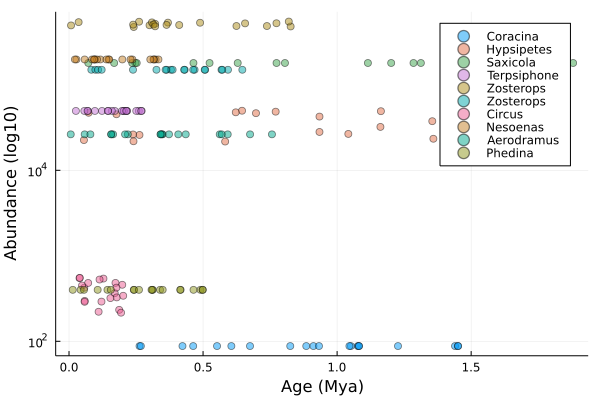

In [101]:
function gethpds(df)
    ages = [x.mrca.data for x in eachrow(df)]
    abunds = collect(zip(df[!, :Minimum], df[!, :Maximum]))
    return ages, abunds
end

function get_data(island)
    df = load_sheet()
    df = get_abunds(df, island)
    df = read_nexus(df)
    df = get_mrcas(df, island, false)
    df
end
df = get_data("Reunion")

nsamps = 20
ages, abunds = gethpds(df)
print(abunds)
plt = []
plot()
for i in 1:length(ages)
    # Get 95% HPD on height
    height_min, height_max = ages[i]["height_range"]
    heights = rand(Uniform(height_min, height_max), nsamps)
    abund = rand(Uniform(abunds[i][1], abunds[i][2].+0.001), nsamps)
    plt = scatter!(heights, abund, xaxis=("Age (Mya)"),
                        yaxis=("Abundance (log10)", :log),
#                        c=distinguishable_colors(10),
#                        c=colormap("Blues", 10),
                        markeralpha=0.5,
                        title="",
                        label=df.Genus[i])
end
display(plt)
png("Reunion_HPD_SAAD.png")

### Truncated normal sampling

In [457]:
SD = sqrt(100) * (50000 - 20500)/3.92
print(SD)
rand(TruncatedNormal(2500, .2, 20500, 20501), 5)


75255.10204081633

5-element Array{Float64,1}:
 20500.000001253302
 20500.000002669356
 20500.000001057237
 20500.000002211917
 20500.00000344966

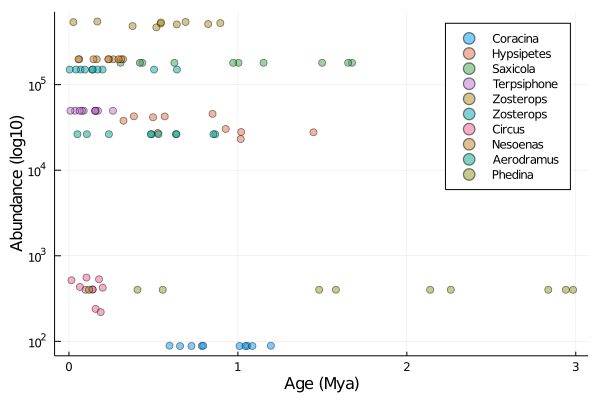

In [13]:
function gethpds(df)
    ages = [x.mrca.data for x in eachrow(df)]
    abunds = collect(zip(df[:Minimum], df[:Maximum]))
    return ages, abunds
end

nsamps = 10
ages, abunds = gethpds(df)
plt = []
plot()
for i in 1:length(ages)
    # Get 95% HPD on height
    height_mean = ages[i]["height"]
    height_min, height_max = ages[i]["height_range"]
    height_sd = sqrt(100) * (height_max - height_min)/3.92
    heights = rand(TruncatedNormal(height_mean, height_sd, height_min, height_max), nsamps)

    abund_mean = (abunds[i][1] + abunds[i][2])/2
    abund_sd = sqrt(100) * (abunds[i][2]+1 - abunds[i][1])/3.92
    abund = rand(TruncatedNormal(abund_mean, abund_sd, abunds[i][1], abunds[i][2]+1), nsamps)
    plt = scatter!(heights, abund, xaxis=("Age (Mya)"),
                        yaxis=("Abundance (log10)", :log),
#                        c=distinguishable_colors(10),
#                        c=colormap("Blues", 10),
                        markeralpha=0.5,
                        title="",
                        label=df.Genus[i])
end
display(plt)

In [16]:
ages[2]
#abunds

Dict{String,Any} with 13 entries:
  "rate_95%_HPD"   => [0.00304144, 0.0276798]
  "length_median"  => 1.48356
  "rate"           => 0.0143389
  "length_range"   => [0.373883, 6.3083]
  "height_range"   => [1.52923e-6, 1.51957]
  "length"         => 1.57452
  "height"         => 0.0674896
  "rate_median"    => 0.0133214
  "length_95%_HPD" => [0.629274, 2.72531]
  "rate_range"     => [0.000703024, 0.0762231]
  "height_95%_HPD" => [1.52923e-6, 0.223422]
  "height_median"  => 0.039872
  "posterior"      => 1.0

# Prototyping and experimentation below here

## Get the tree and clade age

In [98]:
ts = open(parsenexus, Phylo.path("/home/isaac/tmp/julia/SAADs_Toy_Dataset/Saxicola/Saxicola_maxcred.tre"))

┌ Info: Created a tree called "TREE1"
└ @ Phylo /home/isaac/tmp/julia/Phylo.jl/src/newick.jl:500


TreeSet with 1 trees, each with 46 tips.
Tree names are TREE1

TREE1: LinkTree{OneRoot,String,LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}},LinkBranch{OneRoot,String,Dict{String,Any},Float64},Dict{String,Any}} with 46 tips, 91 nodes and 90 branches.
Leaf names are Saxicola_caprata_Indonesia_EU421124, Saxicola_caprata_Indonesia_CytB_EU421122_, Saxicola_caprata_Indonesia_CytB_EU421123, Saxicola_caprata_Indonesia_CytB_HM633373_, Saxicola_insignis_Nepal_CytB_EU421117_, ... [40 omitted] ... and Saxicola_torquata_Nepal_CytB_EU421088_


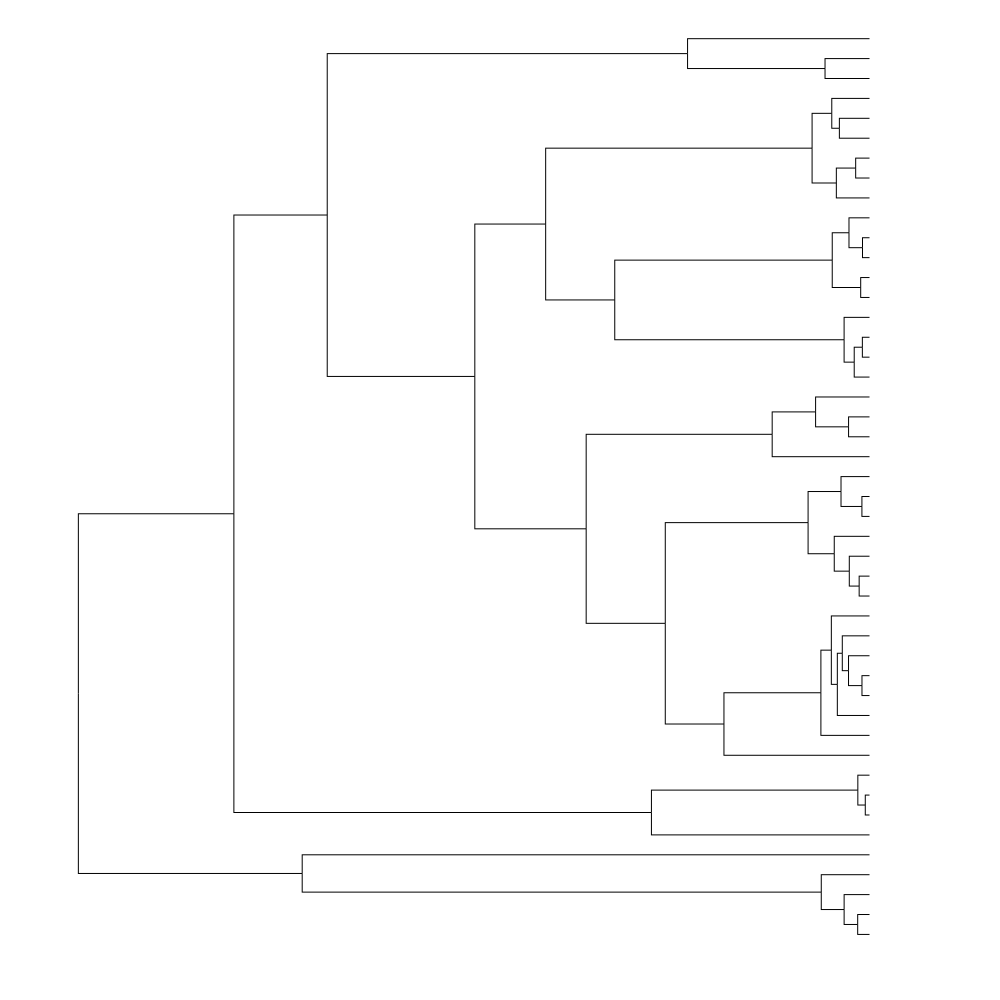

In [99]:
plot(ts["TREE1"], showtips=true)

In [100]:
tre = ts["TREE1"]

LinkTree{OneRoot,String,LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}},LinkBranch{OneRoot,String,Dict{String,Any},Float64},Dict{String,Any}} with 46 tips, 91 nodes and 90 branches.
Leaf names are Saxicola_caprata_Indonesia_EU421124, Saxicola_caprata_Indonesia_CytB_EU421122_, Saxicola_caprata_Indonesia_CytB_EU421123, Saxicola_caprata_Indonesia_CytB_HM633373_, Saxicola_insignis_Nepal_CytB_EU421117_, ... [40 omitted] ... and Saxicola_torquata_Nepal_CytB_EU421088_


In [101]:
target = "Saxicola_tectes"

function getmrca(tre, target, verbose=false)
    lfs = [x for x in getleaves(tre) if occursin(target, string(x))]
    if verbose
        println(lfs)
    end
    anc = [getancestors(tre, x) for x in lfs]
    mrca = intersect(anc...)[1]
end
getmrca(tre, target)

LinkNode Node 72, an internal node with 1 inbound and 2 outbound connections (branches 60 and 51, 52)


In [263]:
print([x for x in names(Phylo) if occursin("get", string(x))])
print([x for x in names(Phylo) if occursin("tree", string(x))])

[:getancestors, :getbranch, :getbranchdata, :getbranches, :getbranchinfo, :getbranchname, :getbranchnames, :getbranchrecord, :getchildren, :getdescendants, :getheight, :getinbound, :getleafinfo, :getleafnames, :getleaves, :getlength, :getnode, :getnodedata, :getnodename, :getnodenames, :getnoderecord, :getnodes, :getonetree, :getoutbounds, :getparent, :getroot, :getrootdistance, :getrootheight, :getroots, :gettreeinfo, :gettreename, :gettreenames, :gettrees][:getonetree, :gettreeinfo, :gettreename, :gettreenames, :gettrees, :ntrees, :treeiter, :treenameiter, :treenametype]

## Trash

### Identifying name parsing issues

In [23]:
## Coracina/Zosterops - Can't have period in taxon name
# Dictionary from parser
#wat = Dict("HM002980" => "HM002980","MG776867" => "MG776867","MK617557" => "MK617557","EF052773" => "EF052773","HM002979" => "HM002979","HM002961" => "HM002961","KF818978" => "KF818978","EF052777" => "EF052777","EF052782" => "EF052782","HM002978" => "HM002978","HM002962" => "HM002962","EF052696" => "EF052696","DQ468946" => "DQ468946","HM002959" => "HM002959",".1" => ".1","DQ468948" => "DQ468948","KF818977" => "KF818977","EF052781" => "EF052781","JQ864445" => "JQ864445","EF052778" => "EF052778","MF149726" => "MF149726","DQ468944" => "DQ468944","DQ468943" => "DQ468943","HM002964" => "HM002964","DQ468956" => "DQ468956","MF149728" => "MF149728","HM002956" => "HM002956","HM002988" => "HM002988","DQ468953" => "DQ468953","KF818980" => "KF818980","HM002971" => "HM002971","EF052779" => "EF052779","DQ468955" => "DQ468955","HM002976" => "HM002976","HM002982" => "HM002982","EF052697" => "EF052697","MF149727" => "MF149727","HM002960" => "HM002960","AY529948" => "AY529948","HM002974" => "HM002974","MG776869" => "MG776869","HM002965" => "HM002965","HM002958" => "HM002958","DQ468958" => "DQ468958","HM002957" => "HM002957","EF052685" => "EF052685","DQ468951" => "DQ468951","DQ468949" => "DQ468949","KF818979" => "KF818979","DQ468952" => "DQ468952","HM002967" => "HM002967","EF052774" => "EF052774","HM002968" => "HM002968","HM002973" => "HM002973","KJ455391" => "KJ455391","HM002954" => "HM002954","EF052686" => "EF052686","JQ864444" => "JQ864444","DQ468957" => "DQ468957","MG776868" => "MG776868","DQ468954" => "DQ468954","HM002953" => "HM002953","DQ468942" => "DQ468942","EF052687" => "EF052687","HM002975" => "HM002975","MK617556" => "MK617556","EF052780" => "EF052780","HM002966" => "HM002966","DQ468947" => "DQ468947","HM002977" => "HM002977","DQ468950" => "DQ468950","HM002955" => "HM002955","EF052776" => "EF052776","DQ468945" => "DQ468945","HM002969" => "HM002969","HM002952" => "HM002952")
# taxanames from the file
#watnames = ["AY529948", "DQ468942", "DQ468943", "DQ468944", "DQ468945", "DQ468946", "DQ468947", "DQ468948", "DQ468949", "DQ468950", "DQ468951", "DQ468952", "DQ468953", "DQ468954", "DQ468955", "DQ468956", "DQ468957", "DQ468958", "EF052685", "EF052686", "EF052687", "EF052696", "EF052697", "EF052773", "EF052774", "EF052776", "EF052777", "EF052778", "EF052779", "EF052780", "EF052781", "EF052782", "HM002952", "HM002953", "HM002954", "HM002955", "HM002956", "HM002957", "HM002958", "HM002959", "HM002960", "HM002961", "HM002962", "HM002964", "HM002965", "HM002966", "HM002967", "HM002968", "HM002969", "HM002971", "HM002973", "HM002974", "HM002975", "HM002976", "HM002977", "HM002978", "HM002979", "HM002980", "HM002982", "HM002988", "JQ864444", "JQ864445", "KF818977", "KF818978", "KF818979", "KF818980", "KJ455391", "MF149726", "MF149727", "MF149728", "MG776867", "MG776868", "MG776869", "MK617556", "MK617557"]

## Nesoenas - Taxon names can't begin with numeric
wat = Dict("ATP86136_Columba_plumbea_Brazil" => "ATP86136_Columba_plumbea_Brazil","SDK_4_Streptopelia_hypopyrrha_Cameroon" => "SDK_4_Streptopelia_hypopyrrha_Cameroon","438650" => "438650","503" => "503","SDK1_Streptopelia_decaocto_Netherlands" => "SDK1_Streptopelia_decaocto_Netherlands","L565_Nesoenas_picturata_Mauritius" => "L565_Nesoenas_picturata_Mauritius","SDK1_Streptopelia_roseogrisea_Cameroon" => "SDK1_Streptopelia_roseogrisea_Cameroon","L598_Nesoenas_picturata_Aldabra" => "L598_Nesoenas_picturata_Aldabra","SDK1_Streptopelia_bitorquata_Captive" => "SDK1_Streptopelia_bitorquata_Captive","436499" => "436499","B995_Geotrygon_montana_Peru" => "B995_Geotrygon_montana_Peru","B4024_Reinwardtoena_browni_Captive" => "B4024_Reinwardtoena_browni_Captive","B34270_Streptopelia_semitorquata_South_Africa" => "B34270_Streptopelia_semitorquata_South_Africa","L593_Nesoenas_picturata_Aldabra" => "L593_Nesoenas_picturata_Aldabra","PRS2168_Streptopelia_vinacea_Central_Africa_Rep" => "PRS2168_Streptopelia_vinacea_Central_Africa_Rep","_Streptopelia_orientalis_Russia" => "_Streptopelia_orientalis_Russia","47282" => "47282","SEA074_Macropygia_tenurirostris_Philippines" => "SEA074_Macropygia_tenurirostris_Philippines","SML1045_Columba_subvinacea_Peru" => "SML1045_Columba_subvinacea_Peru","DHC1_Columba_fasciata_Utah" => "DHC1_Columba_fasciata_Utah","_Columba_rupestris_Mongolia" => "_Columba_rupestris_Mongolia","KPJ5_Zenaida_macroura_Arizona" => "KPJ5_Zenaida_macroura_Arizona","L594_Nesoenas_picturata_Aldabra" => "L594_Nesoenas_picturata_Aldabra","436422" => "436422","L566_Nesoenas_picturata_Seychelles" => "L566_Nesoenas_picturata_Seychelles","L616A_Nesoenas_picturata_Comoros" => "L616A_Nesoenas_picturata_Comoros","436498" => "436498","DHC5_Leptotila_verrauxi_Texas" => "DHC5_Leptotila_verrauxi_Texas","DW4712_Streptopelia_chinensis_Philippines" => "DW4712_Streptopelia_chinensis_Philippines","SDK1_Columba_pulchrichollis_Captive" => "SDK1_Columba_pulchrichollis_Captive","B34209_Streptopelia_senegalensis_South_Africa" => "B34209_Streptopelia_senegalensis_South_Africa","CC2_Columba_arquatrix_South_Africa" => "CC2_Columba_arquatrix_South_Africa","B34271_Streptopelia_capicola_South_Africa" => "B34271_Streptopelia_capicola_South_Africa","AJB556_Columba_oenops_Peru" => "AJB556_Columba_oenops_Peru","L597_Nesoenas_picturata_Aldabra" => "L597_Nesoenas_picturata_Aldabra","_Nesoenas_picturata_Reunion" => "_Nesoenas_picturata_Reunion","L591_Nesoenas_picturata_Aldabra" => "L591_Nesoenas_picturata_Aldabra","_Nesoenas_picturata_Madagascar" => "_Nesoenas_picturata_Madagascar","KPJ5_Zenaida_asiatica_Arizona" => "KPJ5_Zenaida_asiatica_Arizona","L615A_Nesoenas_picturata_Comoros" => "L615A_Nesoenas_picturata_Comoros","_Columba_livia_Utah" => "_Columba_livia_Utah","59755" => "59755","MKL82_Macropygia_mackinlayi_Solomon" => "MKL82_Macropygia_mackinlayi_Solomon","SDK1_Streptopelia_decipiens_Cameroon" => "SDK1_Streptopelia_decipiens_Cameroon","433029" => "433029","427328" => "427328","B793_Leptotila_rufaxilla_Peru" => "B793_Leptotila_rufaxilla_Peru","DAB236_Streptopelia_turtur_Kazakhstan" => "DAB236_Streptopelia_turtur_Kazakhstan","CC1_Nesoenas_picturata_Madagascar" => "CC1_Nesoenas_picturata_Madagascar","B34209_Columba_guinea_South_Africa" => "B34209_Columba_guinea_South_Africa","873" => "873","L595_Nesoenas_picturata_Aldabra" => "L595_Nesoenas_picturata_Aldabra","352779" => "352779","TA_Nesoenas_mayeri_Captive" => "TA_Nesoenas_mayeri_Captive","423" => "423","B2096_Columba_speciosa_Mexico" => "B2096_Columba_speciosa_Mexico","L563_Nesoenas_picturata_Seychelles" => "L563_Nesoenas_picturata_Seychelles","SDK2_Streptopelia_tranquebarica_Captive" => "SDK2_Streptopelia_tranquebarica_Captive","L592_Nesoenas_picturata_Aldabra" => "L592_Nesoenas_picturata_Aldabra","429308" => "429308","2109" => "2109","TA_Columba_palumbus_Captive" => "TA_Columba_palumbus_Captive","L600_Nesoenas_picturata_Aldabra" => "L600_Nesoenas_picturata_Aldabra","B1798_Columba_leucocephala_Florida" => "B1798_Columba_leucocephala_Florida","352781" => "352781")
watnames = ["2109_Nesoenas_picturata_Reunion", "352779_Nesoenas_picturata_Madagascar", "352781_Nesoenas_picturata_Madagascar", "423_Columba_livia_Utah", "427328_Nesoenas_picturata_Madagascar", "429308_Nesoenas_picturata_Madagascar", "433029_Nesoenas_picturata_Madagascar", "436422_Nesoenas_picturata_Madagascar", "436498_Nesoenas_picturata_Madagascar", "436499_Nesoenas_picturata_Madagascar", "438650_Nesoenas_picturata_Madagascar", "47282_Streptopelia_orientalis_Russia", "503_Nesoenas_picturata_Reunion", "59755_Columba_rupestris_Mongolia", "873_Nesoenas_picturata_Reunion", "AJB556_Columba_oenops_Peru", "ATP86136_Columba_plumbea_Brazil", "B1798_Columba_leucocephala_Florida", "B2096_Columba_speciosa_Mexico", "B34209_Columba_guinea_South_Africa", "B34209_Streptopelia_senegalensis_South_Africa", "B34270_Streptopelia_semitorquata_South_Africa", "B34271_Streptopelia_capicola_South_Africa", "B4024_Reinwardtoena_browni_Captive", "B793_Leptotila_rufaxilla_Peru", "B995_Geotrygon_montana_Peru", "CC1_Nesoenas_picturata_Madagascar", "CC2_Columba_arquatrix_South_Africa", "DAB236_Streptopelia_turtur_Kazakhstan", "DHC1_Columba_fasciata_Utah", "DHC5_Leptotila_verrauxi_Texas", "DW4712_Streptopelia_chinensis_Philippines", "KPJ5_Zenaida_asiatica_Arizona", "KPJ5_Zenaida_macroura_Arizona", "L563_Nesoenas_picturata_Seychelles", "L565_Nesoenas_picturata_Mauritius", "L566_Nesoenas_picturata_Seychelles", "L591_Nesoenas_picturata_Aldabra", "L592_Nesoenas_picturata_Aldabra", "L593_Nesoenas_picturata_Aldabra", "L594_Nesoenas_picturata_Aldabra", "L595_Nesoenas_picturata_Aldabra", "L597_Nesoenas_picturata_Aldabra", "L598_Nesoenas_picturata_Aldabra", "L600_Nesoenas_picturata_Aldabra", "L615A_Nesoenas_picturata_Comoros", "L616A_Nesoenas_picturata_Comoros", "MKL82_Macropygia_mackinlayi_Solomon", "PRS2168_Streptopelia_vinacea_Central_Africa_Rep", "SDK1_Columba_pulchrichollis_Captive", "SDK1_Streptopelia_bitorquata_Captive", "SDK1_Streptopelia_decaocto_Netherlands", "SDK1_Streptopelia_decipiens_Cameroon", "SDK1_Streptopelia_roseogrisea_Cameroon", "SDK2_Streptopelia_tranquebarica_Captive", "SDK_4_Streptopelia_hypopyrrha_Cameroon", "SEA074_Macropygia_tenurirostris_Philippines", "SML1045_Columba_subvinacea_Peru", "TA_Columba_palumbus_Captive", "TA_Nesoenas_mayeri_Captive"]
length(watnames)
println(setdiff(keys(wat), watnames))
println(setdiff(watnames, keys(wat)))

Set(["438650", "_Nesoenas_picturata_Reunion", "503", "_Nesoenas_picturata_Madagascar", "_Columba_livia_Utah", "59755", "433029", "427328", "436499", "873", "352779", "423", "_Streptopelia_orientalis_Russia", "47282", "429308", "2109", "_Columba_rupestris_Mongolia", "436422", "436498", "352781"])
["2109_Nesoenas_picturata_Reunion", "352779_Nesoenas_picturata_Madagascar", "352781_Nesoenas_picturata_Madagascar", "423_Columba_livia_Utah", "427328_Nesoenas_picturata_Madagascar", "429308_Nesoenas_picturata_Madagascar", "433029_Nesoenas_picturata_Madagascar", "436422_Nesoenas_picturata_Madagascar", "436498_Nesoenas_picturata_Madagascar", "436499_Nesoenas_picturata_Madagascar", "438650_Nesoenas_picturata_Madagascar", "47282_Streptopelia_orientalis_Russia", "503_Nesoenas_picturata_Reunion", "59755_Columba_rupestris_Mongolia", "873_Nesoenas_picturata_Reunion"]


### How to generate the taxa list errors

In [55]:
nex = """#NEXUS

Begin taxa;
    Dimensions ntax=3;
    TaxLabels
        _2109_Nesoenas_picturata_Reunion
        2108_Nesoenas_picturata_Reunion
        AY529948.1
        ;
End;
Begin trees;
    Translate
        1 _2109_Nesoenas_picturata_Reunion,
        2 2108_Nesoenas_picturata_Reunion,
        3 AY529948.1
        ;
    tree TREE1 = [&R] (2:0.2311195,(1:0.18127275,3:0.18127275)3:0.049846749999999995);
End;
"""
open("/tmp/tmp.tre","w") do io
   println(io, nex)
end

ts = open(parsenexus, Phylo.path("/tmp/tmp.tre"))


┌ Warning: Dict("AY529948" => "AY529948","_Nesoenas_picturata_Reunion" => "_Nesoenas_picturata_Reunion",".1" => ".1","2108" => "2108","_2109_Nesoenas_picturata_Reunion" => "_2109_Nesoenas_picturata_Reunion")
└ @ Phylo /home/isaac/tmp/julia/Phylo.jl/src/newick.jl:443
┌ Warning: Taxa list length (5) and ntax (3) do not match
└ @ Phylo /home/isaac/tmp/julia/Phylo.jl/src/newick.jl:444
┌ Warning: Missing ',' in taxa block, but in 'trees -> translate' block
└ @ Phylo /home/isaac/tmp/julia/Phylo.jl/src/newick.jl:476
┌ Warning: Missing ';' in taxa block, but in 'trees -> translate' block
└ @ Phylo /home/isaac/tmp/julia/Phylo.jl/src/newick.jl:476
┌ Warning: Missing 'TREE1' in taxa block, but in 'trees -> translate' block
└ @ Phylo /home/isaac/tmp/julia/Phylo.jl/src/newick.jl:476
┌ Warning: Missing '[' in taxa block, but in 'trees -> translate' block
└ @ Phylo /home/isaac/tmp/julia/Phylo.jl/src/newick.jl:476
┌ Warning: Missing 'R' in taxa block, but in 'trees -> translate' block
└ @ Phylo /home/

TreeSet with 0 trees, each with 0 tips.
Tree names are 


In [208]:
tre = ts["TREE1"]

## Get all the leaves of interest
target = "Saxicola_tectes"
lfs = [x for x in getleaves(tre) if occursin(target, string(x))]
lfs[1].data
lfs

5-element Array{LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}},1}:
 LinkNode Saxicola_tectes_REUNION_EU190909, a tip of the tree with an incoming connection (branch 45).

 LinkNode Saxicola_tectes_REUNION_EU190910, a tip of the tree with an incoming connection (branch 46).

 LinkNode Saxicola_tectes_REUNION_EU190911, a tip of the tree with an incoming connection (branch 47).

 LinkNode Saxicola_tectes_REUNION_EU190912, a tip of the tree with an incoming connection (branch 48).

 LinkNode Saxicola_tectes_REUNION_EU421119_, a tip of the tree with an incoming connection (branch 50).


In [243]:
anc = [getancestors(tre, x) for x in lfs]
println(lfs[1])
println(lfs[1].data["height"], lfs[1].inbound)
println(anc[1])
println([x.inbound for x in anc[1]])
print([x.data["height"] for x in anc[1]])
mrca = intersect(anc...)[1]
#mrca

LinkNode Saxicola_tectes_REUNION_EU190909, a tip of the tree with an incoming connection (branch 45).

1.7469238015989779e-7LinkBranch 45, from node Node 69 to node Saxicola_tectes_REUNION_EU190909 (length 0.08762820910797045).

LinkNode{OneRoot,String,Dict{String,Any},LinkBranch{OneRoot,String,Dict{String,Any},Float64}}[LinkNode Node 69, an internal node with 1 inbound and 2 outbound connections (branches 51 and 45, 46)
, LinkNode Node 72, an internal node with 1 inbound and 2 outbound connections (branches 60 and 51, 52)
, LinkNode Node 76, an internal node with 1 inbound and 2 outbound connections (branches 71 and 59, 60)
, LinkNode Node 82, an internal node with 1 inbound and 2 outbound connections (branches 74 and 71, 72)
, LinkNode Node 83, an internal node with 1 inbound and 2 outbound connections (branches 79 and 73, 74)
, LinkNode Node 86, an internal node with 1 inbound and 2 outbound connections (branches 88 and 79, 80)
, LinkNode Node 90, an internal node with 1 inbound and

LinkNode Node 72, an internal node with 1 inbound and 2 outbound connections (branches 60 and 51, 52)


In [278]:
keeptips!(tre, lfs)
plot(tre)
getnode(tre, "Node 72").data

Dict{String,Any} with 13 entries:
  "rate_95%_HPD"   => [0.00659642, 0.0214815]
  "length_median"  => 2.26023
  "rate"           => 0.0127974
  "length_range"   => [0.350405, 6.71901]
  "height_range"   => [0.0667782, 1.9467]
  "length"         => 2.32865
  "height"         => 0.370376
  "rate_median"    => 0.0116503
  "length_95%_HPD" => [1.08399, 3.66729]
  "rate_range"     => [0.00287563, 0.0661195]
  "height_95%_HPD" => [0.13001, 0.657064]
  "height_median"  => 0.345065
  "posterior"      => 0.9996

In [20]:
for island in ["Reunion", "Mauritius", "Rodriguez"]
    print(island, "\n")
    tdf = load_sheet()
    tdf = get_abunds(tdf, island)
    tdf = read_nexus(tdf)
    tdf = get_mrcas(tdf, island)
    print(getdata(tdf), "\n")
end
plot()
plot_saad("Reunion")
plot_saad("Mauritius")
png("Mascarene_SAAD")

Reunion
([0.7193396464076218, 0.06748956554590739, 0.37037593356333487, 0.02815927511276756, 0.12171336597321285, 0.10180970562703719, 0.022642568761800347, 0.05794101756357291, 0.06006412791448501, 0.2661623967485962], Any[88, 20500, 180000, 49500, 465000, 150000, 200, 198000, 26354, 400])
Mauritius
([0.7193396464076218, 0.143429941925178, 0.1146682342793967, 0.5442962791558384, 0.07625165171674868, 0.17162736542487242, 0.33737550893310325, 0.018616997618832228, 2.119025680390747, 0.029253141083029576, 0.04906314569492196, 0.2661623967485962], Any[520, 216, 560, 533, 200, 191, 68000, 350, 380, 200000, 4172, 300])
Rodriguez
(Any[], Any[])
